In [431]:
%matplotlib inline

import numpy as np, pandas as pd, requests, matplotlib.pyplot as plt, mpl_toolkits.mplot3d.axes3d as axes3d, matplotlib as mpl
from bs4 import BeautifulSoup as bs
#mpl.rcParams['font.family'] = 'Consolas'
#plt.rcParams['font.size'] = 18
#plt.rcParams['axes.linewidth'] = 2

In [5]:
nullstats = pd.read_csv("pulsarstats.csv",usecols=[i+1 for i in range(6)])
nullstats["NF"] = [(entry.split("±")[0] if "±" in entry else entry.split("≤")[1] if "≤" in entry else entry.split("≥")[1] if "≥" in entry else entry) for entry in nullstats["NF (%)"]]
nullstats["NF"] = nullstats["NF"].astype(float)
nullstats["NF_e"] = [((entry.split("±")[1],entry.split("±")[1]) if "±" in entry else (entry.split("≤")[1],0) if "≤" in entry else (0,100-float(entry.split("≥")[1])) if "≥" in entry else (0,0)) for entry in nullstats["NF (%)"]]
nullstats["NF_e"] = [[float(negative),float(positive)] for (negative,positive) in nullstats["NF_e"]]
nullstats.drop(["NF (%)"],axis=1,inplace=True)

In [399]:
page = requests.get("https://www.atnf.csiro.au/people/pulsar/psrcat/proc_form.php?version=1.63&table_top.x=27&table_top.y=31&Name=Name&JName=JName&GL=GL&GB=GB&RaJD=RaJD&DecJD=DecJD&P0=P0&P1=P1&DM=DM&Dist=Dist&ZZ=ZZ&XX=XX&YY=YY&Type=Type&NGlt=NGlt&Age=Age&Bsurf=Bsurf&Edot=Edot&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query").content
lines = bs(page).find('pre').get_text().split('\n')
data = [pulsar for pulsar in [line.split() for line in lines] if len(pulsar) > 1]

for pulsar in data[2:]:
    for i in [25,23,17,16,14,13,11,10,4,2]:
        del pulsar[i]

data[1] = [None,None]+data[1]

ATNF = pd.DataFrame(data[2:], columns=data[0])
numeric_cols=['#', 'Gl', 'Gb', 'RAJD', 'DECJD', 'P0', 'P1', 'DM', 'DIST', 'ZZ', 'XX', 'YY', 'NGLT', 'AGE', 'BSURF', 'EDOT']
ATNF[numeric_cols] = ATNF[numeric_cols].apply(pd.to_numeric, errors='coerce')
ATNF = ATNF.set_index('#').rename(columns={"PSR": "TYPE"}).dropna(subset=["P0","P1"])
ATNF.index.name = None
ATNF["RR"] = list(np.sqrt(ATNF.XX**2+ATNF.YY*2+ATNF.ZZ**2))

In [400]:
merged = pd.merge(ATNF,nullstats,left_on="PSRJ",right_on="J-Name").drop(["PSR name","J-Name","P (s)","B (G)"],axis=1)
display(merged)

,NAME,PSRJ,Gl,Gb,RAJD,DECJD,P0,P1,DM,DIST,...,YY,TYPE,NGLT,AGE,BSURF,EDOT,RR,References,NF,NF_e
0,B0031-07,J0034-0721,110.420,-69.815,8.53696,-7.36484,0.942951,4.082100e-16,10.92200,1.03,...,8.62,*,NaN,36600000.0,6.280000e+11,1.900000e+31,4.276658,Gajjar (2017),44.0,"[1.0, 1.0]"
1,B0045+33,J0048+3412,122.255,-28.666,12.14160,34.20223,1.217094,2.354540e-15,39.92200,4.50,...,10.61,*,NaN,8190000.0,1.710000e+12,5.200000e+31,6.086148,Redman and Rankin (2009),21.0,"[1.0, 1.0]"
2,B0148-06,J0151-0635,160.368,-65.004,27.84466,-6.58416,1.464665,4.425900e-16,25.66000,25.00,...,18.45,*,NaN,52400000.0,8.150000e+11,5.600000e+30,23.727160,Biggs (1992),5.0,"[5.0, 0.0]"
3,B0149-16,J0152-1637,179.306,-72.457,28.04522,-16.63157,0.832742,1.299202e-15,11.92577,0.92,...,8.78,*,NaN,10200000.0,1.050000e+12,8.900000e+31,4.281869,Vivekanand (1995),2.5,"[2.5, 0.0]"
4,B0301+19,J0304+1932,161.135,-33.270,46.13798,19.54761,1.387584,1.295235e-15,15.65677,0.74,...,9.09,*,NaN,17000000.0,1.360000e+12,1.900000e+31,4.288135,Rankin (1986),10.0,"[0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,B2315+21,J2317+2149,95.831,-36.075,349.49101,21.83001,1.444653,1.047047e-15,20.86959,1.96,...,8.66,*,NaN,21900000.0,1.240000e+12,1.400000e+31,4.597706,Weisberg et al. (1986),3.0,"[0.5, 0.5]"
143,B2319+60,J2321+6024,112.095,-0.566,350.48006,60.40853,2.256488,7.036890e-15,94.59100,2.70,...,9.52,*,NaN,5080000.0,4.030000e+12,2.400000e+31,5.029006,Gajjar (2017),29.0,"[1.0, 1.0]"
144,B2327-20,J2330-2005,49.394,-70.190,352.61202,-20.09156,1.643622,4.630380e-15,8.45600,0.86,...,8.31,*,NaN,5620000.0,2.790000e+12,4.100000e+31,4.162271,Biggs (1992),12.0,"[1.0, 1.0]"
145,J2346-0609,J2346-0609,83.798,-64.015,356.71041,-6.16664,1.181463,1.363050e-15,22.50400,3.70,...,8.32,*,NaN,13700000.0,1.280000e+12,3.300000e+31,5.506451,Basu et al. (2017),42.5,"[3.8, 3.8]"


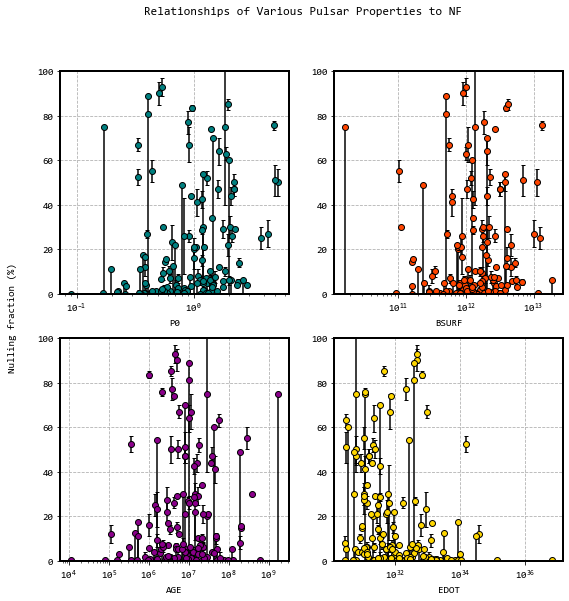

In [432]:
fig = plt.figure(figsize=(9,9))

axes = [fig.add_subplot(arrangement) for arrangement in [221,222,223,224]]
xvars = ["P0","BSURF","AGE","EDOT"]
colors = dict(zip(xvars,["teal","orangered","darkmagenta","gold"]))

NF_errors = np.array(list(merged["NF_e"])).T


for ax,xvar in zip(axes,xvars):
    ax.errorbar(merged[xvar],merged["NF"],yerr=NF_errors,fmt="o",ecolor="k",capsize=2,mfc=colors[xvar],mec="k")
    ax.set_xscale("log")
    ax.set_xlabel(xvar)

    ax.set_ylim((0,100))
    ax.grid(linestyle="--")

fig.suptitle("Relationships of Various Pulsar Properties to NF")
fig.text(0.05,0.5, "Nulling fraction (%)", ha="center", va="center", rotation=90)

plt.show()

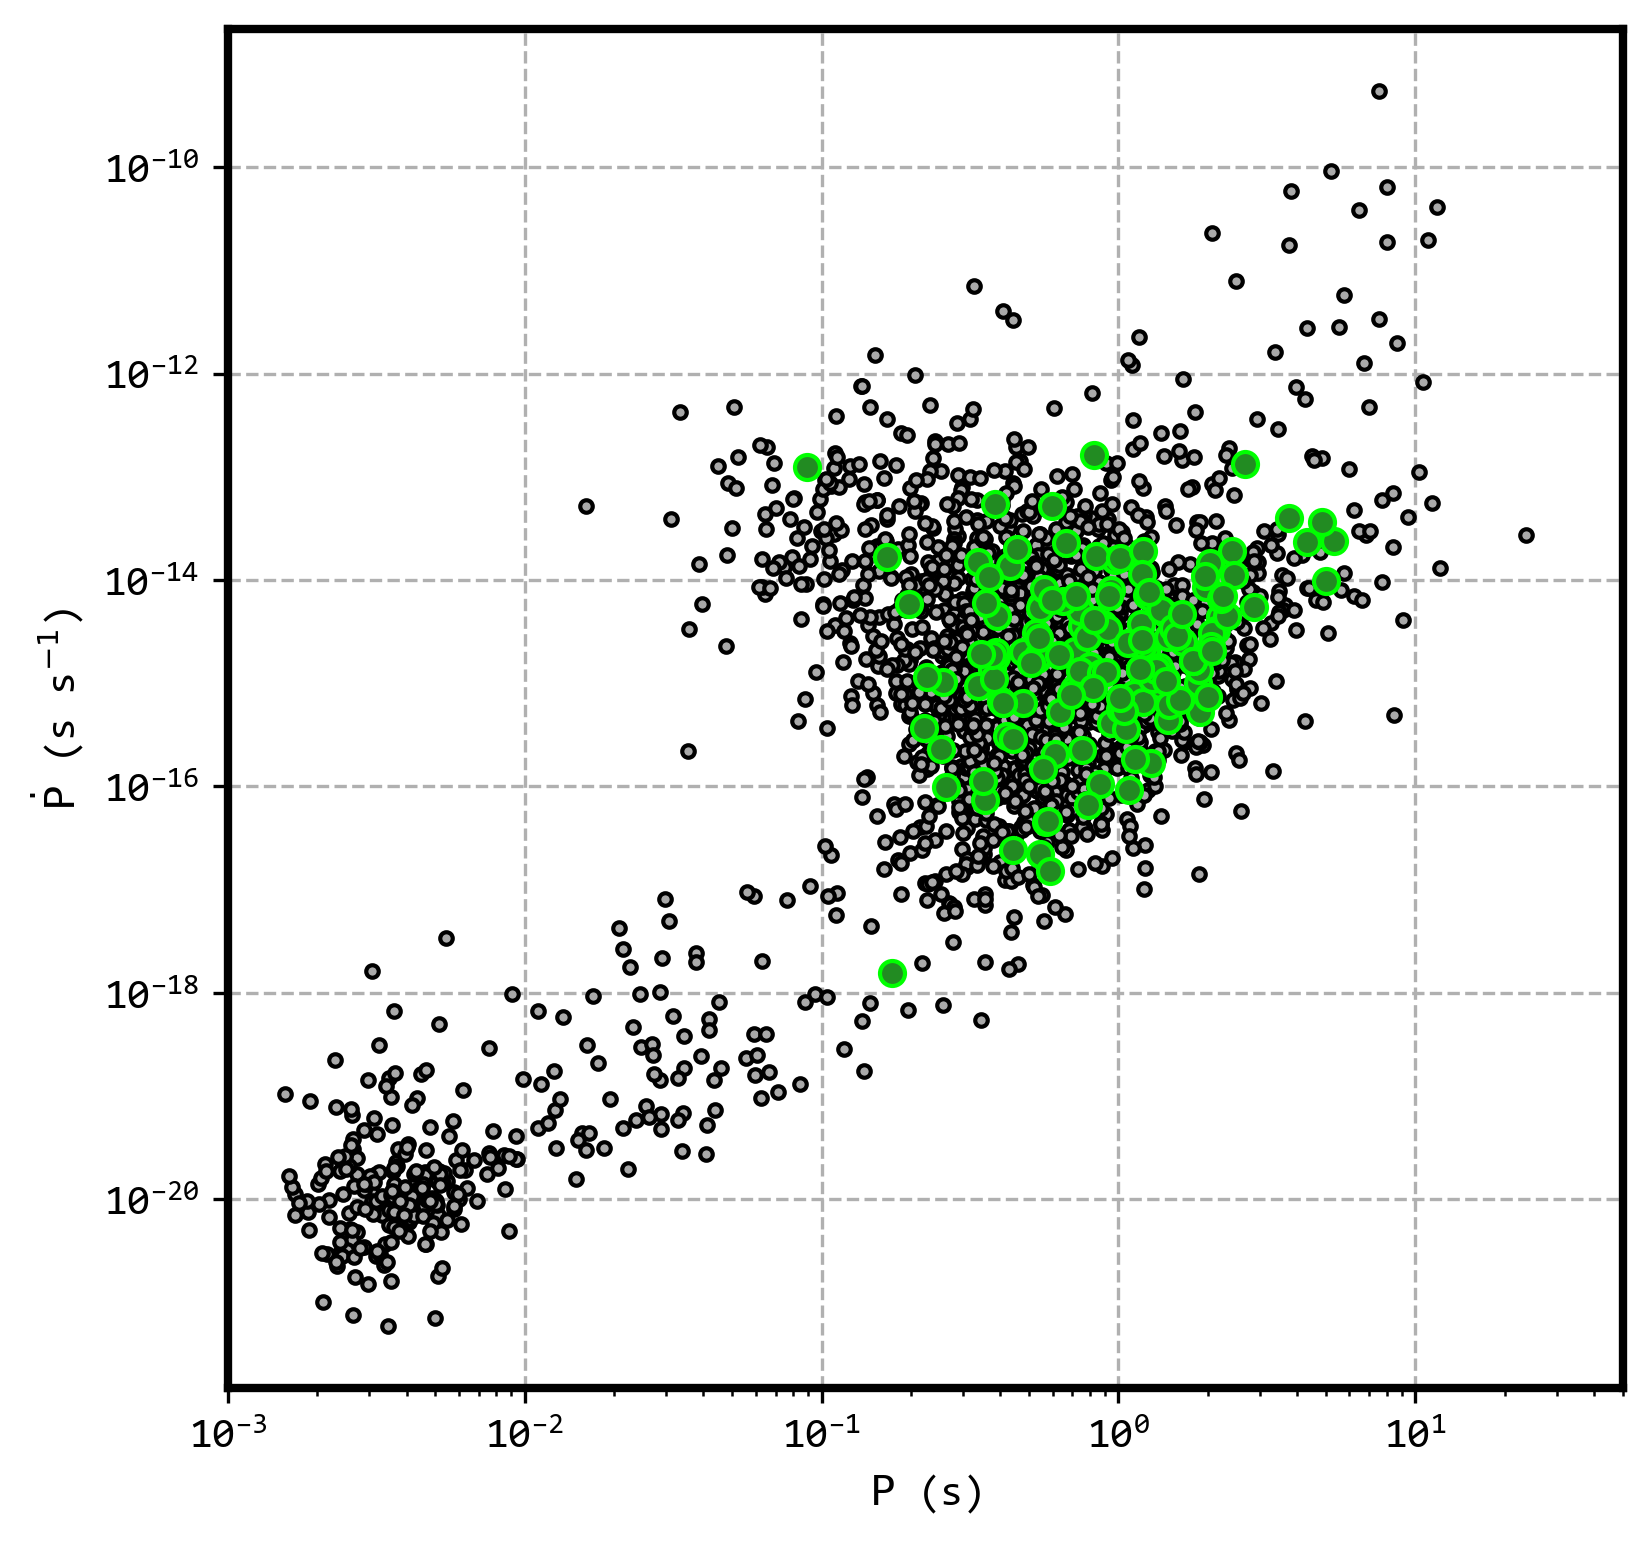

In [467]:
fig, ax = plt.subplots(figsize=(6,6),dpi=300)

plt.loglog(ATNF.P0,ATNF.P1,".",mfc="darkgrey",mec="k")
plt.loglog(merged.P0,merged.P1,"o",mfc="forestgreen",mec="lime")
plt.xlabel("$\mathrm{P}$ (s)")
plt.ylabel("$\dot{\mathrm{P}}$ (s s$^{-1}$)")
plt.grid(linestyle="--")
plt.xlim((1e-3,.5e2))

plt.show()

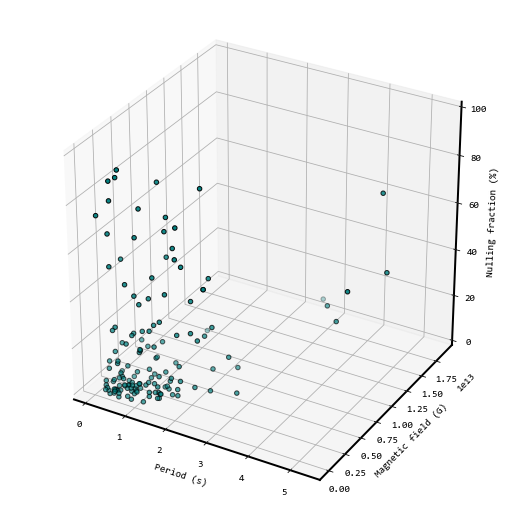

In [435]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1],projection='3d')

ax.scatter(merged.P0,merged.BSURF,merged.NF,color="teal",edgecolor="black")
ax.set_xlabel("Period (s)")
ax.set_ylabel("Magnetic field (G)")
ax.set_zlabel("Nulling fraction (%)")

ax.set_zlim3d(0, 100)

plt.show()

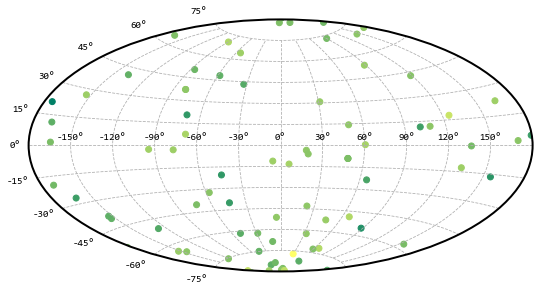

In [436]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1],projection='aitoff')
ax.scatter(merged.Gl,merged.Gb,c=np.log10(merged.DIST),cmap="summer")
ax.grid(linestyle="--")

plt.show()

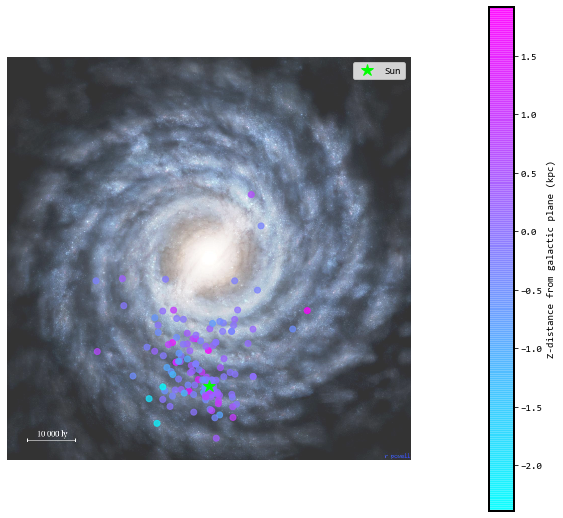

In [437]:
polarfig = plt.figure(figsize=(7,7))
aximage = polarfig.add_axes([0,0,0.8,1],zorder=-1)
axplot = polarfig.add_axes([0,0,1,1],projection='polar',zorder=1)

galaxy = plt.imread("galaxy.jpg")
aximage.imshow(galaxy,alpha=.8)
aximage.axis('off')

theta = np.array([(np.arctan(y/x) if x > 0 else np.arctan(y/x)+np.pi if x<0 else y/np.abs(y) * np.pi/2) for x,y in zip(merged.XX,merged.YY)])+np.pi
r = np.sqrt(merged.XX**2+merged.YY**2)
colordists = [(-np.nan if Z < -2.5 else np.nan if Z > 2.5 else Z) for Z in merged.ZZ]

polarplot = axplot.scatter(theta,r,c=colordists,marker="o",cmap="cool",alpha=0.75)
sunpoint = axplot.plot(-np.pi/2,8.2,marker="*",markersize=12,linestyle="",color="lime",label="Sun")
axplot.set_facecolor('none')
axplot.set_rlim((0,13))
axplot.set_xticklabels([])
axplot.set_ylabel("Distance (kpc)")
axplot.axis('off')
axplot.legend()
polarfig.colorbar(polarplot,anchor=(1.05,0.0),label="Z-distance from galactic plane (kpc)")
plt.show()
polarfig.savefig("glitchingmap.png",bbox_inches="tight",dpi=300)

(0, 15)

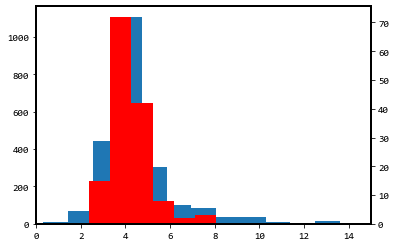

In [438]:
plt.hist(ATNF.RR,50)
plt.twinx()
plt.hist(merged.RR,50,color="red")
plt.xlim((0,15))